In [1]:
# Some calculation for the LHF coupling and separation across spatial scales.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
import sys; sys.path.insert(1, '/home/alessandro/thesis_material/EURECA_scripts')
import geometry as gm
import warnings; warnings.filterwarnings("ignore")

from func_statistics import *

## HIGH PASS

In [33]:
passalto_files = glob.glob('/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW*passalto*DIR*.nc')
passalto_files = sorted(passalto_files)

ds_cou = xr.open_dataset(passalto_files[0])
ds_for = xr.open_dataset(passalto_files[1])


lambda_U_for = ds_for['lambda_U'].values
lambda_sst_for = ds_for['lambda_sst'].values
lambda_q_for = ds_for['lambda_q'].values
lambda_ta_for = ds_for['lambda_ta'].values
lambda_RH_for = ds_for['lambda_RH'].values

var_lhf_for = ds_for['var_lhf'].values
var_qa_for = ds_for['var_qa'].values
var_U_for = ds_for['var_U'].values
var_ta_for = ds_for['var_ta'].values
var_RH_for = ds_for['var_RH'].values
covar_U_ta_for = ds_for['covar_U_ta'].values
covar_U_RH_for = ds_for['covar_U_RH'].values
covar_ta_RH_for = ds_for['covar_ta_RH'].values
covar_U_q_for = ds_for['covar_U_q'].values

# sst terms
var_sst_for = ds_for['var_sst'].values
covar_ta_sst_for = ds_for['covar_ta_sst'].values
covar_U_sst_for = ds_for['covar_U_sst'].values
covar_RH_sst_for = ds_for['covar_RH_sst'].values
covar_q_sst_for = ds_for['covar_q_sst'].values


# sst_terms_for = (lambda_sst_for**2*var_sst_for + 2*lambda_sst_for*(lambda_U_for*covar_U_sst_for + \
#                                                                    lambda_ta_for*covar_ta_sst_for + \
#                                                                    lambda_RH_for*covar_RH_sst_for ))
# non_sst_terms_for = (lambda_U_for**2*var_U_for + lambda_ta_for**2*var_ta_for + lambda_RH_for**2*var_RH_for + 
#                      lambda_U_for*lambda_ta_for*covar_U_ta_for + lambda_U_for*lambda_RH_for*covar_U_RH_for + \
#                      lambda_ta_for*lambda_RH_for*covar_ta_RH_for)
# var_lhf_sum_for = sst_terms_for + non_sst_terms_for



sst_terms_for = (lambda_sst_for**2*var_sst_for + 2*lambda_sst_for*(lambda_U_for*covar_U_sst_for +\
                                                                   lambda_q_for*covar_q_sst_for ))
non_sst_terms_for = (lambda_U_for**2*var_U_for + lambda_q_for**2*var_qa_for + 2*lambda_q_for*lambda_U_for*covar_U_q_for)
var_lhf_sum_for = sst_terms_for + non_sst_terms_for




# Variables for ds_cou
lambda_U_cou = ds_cou['lambda_U'].values
lambda_sst_cou = ds_cou['lambda_sst'].values
lambda_q_cou = ds_cou['lambda_q'].values
lambda_ta_cou = ds_cou['lambda_ta'].values
lambda_RH_cou = ds_cou['lambda_RH'].values

var_lhf_cou = ds_cou['var_lhf'].values
var_qa_cou = ds_cou['var_qa'].values
var_U_cou = ds_cou['var_U'].values
var_ta_cou = ds_cou['var_ta'].values
var_RH_cou = ds_cou['var_RH'].values
covar_U_ta_cou = ds_cou['covar_U_ta'].values
covar_U_RH_cou = ds_cou['covar_U_RH'].values
covar_ta_RH_cou = ds_cou['covar_ta_RH'].values
covar_U_q_cou = ds_cou['covar_U_q'].values

# sst terms
var_sst_cou = ds_cou['var_sst'].values
covar_ta_sst_cou = ds_cou['covar_ta_sst'].values
covar_U_sst_cou = ds_cou['covar_U_sst'].values
covar_RH_sst_cou = ds_cou['covar_RH_sst'].values
covar_q_sst_cou = ds_cou['covar_q_sst'].values


sst_terms_cou = (lambda_sst_cou**2*var_sst_cou + 2*lambda_sst_cou*(lambda_U_cou*covar_U_sst_cou +\
                                                                   lambda_q_cou*covar_q_sst_cou ))
non_sst_terms_cou = (lambda_U_cou**2*var_U_cou + lambda_q_cou**2*var_qa_cou + 2*lambda_q_cou*lambda_U_cou*covar_U_q_cou)
var_lhf_sum_cou = sst_terms_cou + non_sst_terms_cou


### computing relative contributions and their statistical modes

In [34]:
# var_lhf_sum_for*100./var_lhf_for
tot_sst_for_pc = sst_terms_for*100./var_lhf_for
tot_Nonsst_for_pc = non_sst_terms_for*100./var_lhf_for
varU_for_pc = lambda_U_for**2*var_U_for*100/var_lhf_for
varQ_for_pc = lambda_q_for**2*var_qa_for*100/var_lhf_for
varSST_for_pc = lambda_sst_for**2*var_sst_for*100/var_lhf_for
covUSST_for_pc = lambda_U_for*lambda_sst_for*covar_U_sst_for*100*2/var_lhf_for
covQSST_for_pc = lambda_q_for*lambda_sst_for*covar_q_sst_for*100*2/var_lhf_for
covQU_for_pc = lambda_U_for*lambda_q_for*covar_U_q_for*100*2/var_lhf_for

# vars_for_pc = {'tot_sst_for_pc':tot_sst_for_pc, 'tot_Nonsst_for_pc':tot_Nonsst_for_pc, 'varU_for_pc':varU_for_pc, \
#                'varQ_for_pc':varQ_for_pc, 'varSST_for_pc':varSST_for_pc, \
#                'covUSST_for_pc':covUSST_for_pc, 'covQSST_for_pc':covQSST_for_pc, 'covQU_for_pc':covQU_for_pc}


vars_for_pc = {'SST all':tot_sst_for_pc, 'NON-SST all':tot_Nonsst_for_pc, 'U_U':varU_for_pc, 'Q_Q':varQ_for_pc, 'SST_SST':varSST_for_pc, 'U_SST':covUSST_for_pc, 'Q_SST':covQSST_for_pc, 'Q_U':covQU_for_pc}



# var_lhf_sum_cou*100./var_lhf_cou
tot_sst_cou_pc = sst_terms_cou*100./var_lhf_cou
tot_Nonsst_cou_pc = non_sst_terms_cou*100./var_lhf_cou
varU_cou_pc = lambda_U_cou**2*var_U_cou*100/var_lhf_cou
varQ_cou_pc = lambda_q_cou**2*var_qa_cou*100/var_lhf_cou
varSST_cou_pc = lambda_sst_cou**2*var_sst_cou*100/var_lhf_cou
covUSST_cou_pc = lambda_U_cou*lambda_sst_cou*covar_U_sst_cou*100*2/var_lhf_cou
covQSST_cou_pc = lambda_q_cou*lambda_sst_cou*covar_q_sst_cou*100*2/var_lhf_cou
covQU_cou_pc = lambda_U_cou*lambda_q_cou*covar_U_q_cou*100*2/var_lhf_cou

# vars_cou_pc = {'tot_sst_cou_pc':tot_sst_cou_pc, 'tot_Nonsst_cou_pc':tot_Nonsst_cou_pc, 'varU_cou_pc':varU_cou_pc, \
#                'varQ_cou_pc':varQ_cou_pc, 'varSST_cou_pc':varSST_cou_pc, \
#                'covUSST_cou_pc':covUSST_cou_pc, 'covQSST_cou_pc':covQSST_cou_pc, 'covQU_cou_pc':covQU_cou_pc}

vars_cou_pc = {'SST all':tot_sst_cou_pc, 'NON-SST all':tot_Nonsst_cou_pc, 'U_U':varU_cou_pc, 'Q_Q':varQ_cou_pc, 'SST_SST':varSST_cou_pc,'U_SST':covUSST_cou_pc, 'Q_SST':covQSST_cou_pc, 'Q_U':covQU_cou_pc}

In [35]:
medians_for = {}

for var_name, values in vars_for_pc.items():
    medians_for[var_name] = np.nanmedian(values, axis=(1,2))
    
    
medians_cou = {}

for var_name, values in vars_cou_pc.items():
    medians_cou[var_name] = np.nanmedian(values, axis=(1,2))
        

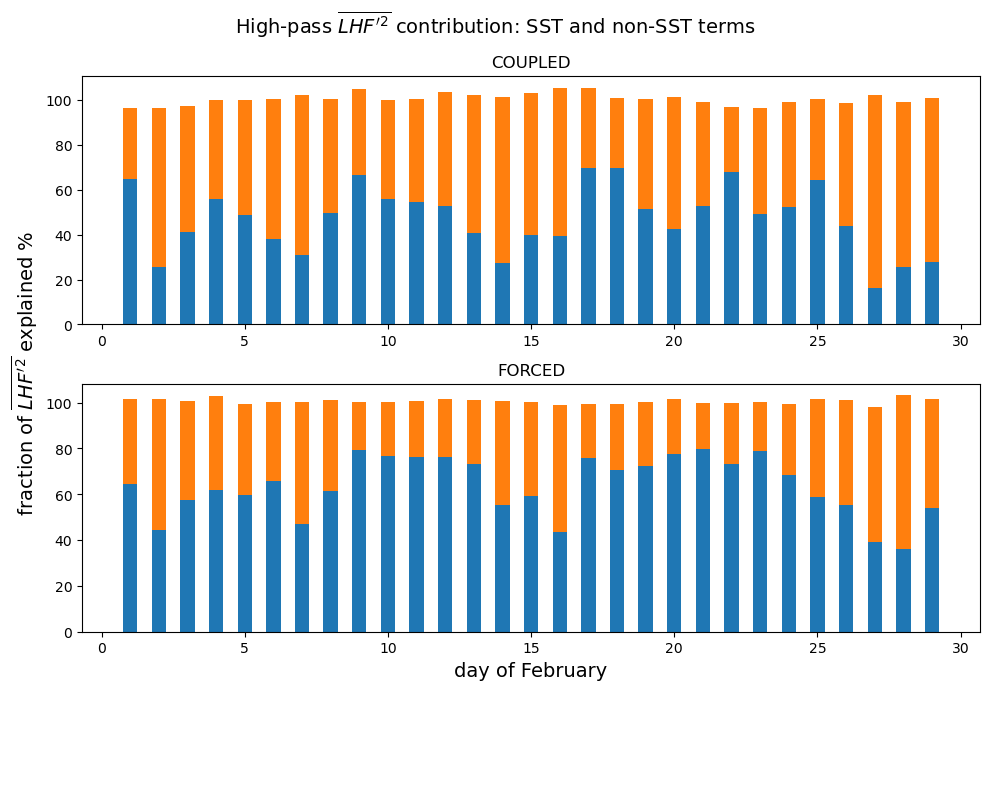

In [37]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

fig.suptitle(r"High-pass $\overline{LHF'^{2}}$ contribution: SST and non-SST terms", fontsize=14)



days = np.arange(1,30)
width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_for.items():
    if 'all' in boolean:
        p = ax1.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

# ax.set_title("Number of penguins with above average body mass")
# ax.legend(loc="upper right")
ax1.set_title('FORCED', fontsize=12)
ax1.set_xlabel('day of February', fontsize=14)




width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_cou.items():
    if 'all' in boolean:
        p = ax0.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

ax0.set_title('COUPLED', fontsize=12)
ax1.set_ylabel(r"                                            fraction of $\overline{LHF'^{2}}$ explained %", fontsize=14)



# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [68]:
boolean


'Q_U'

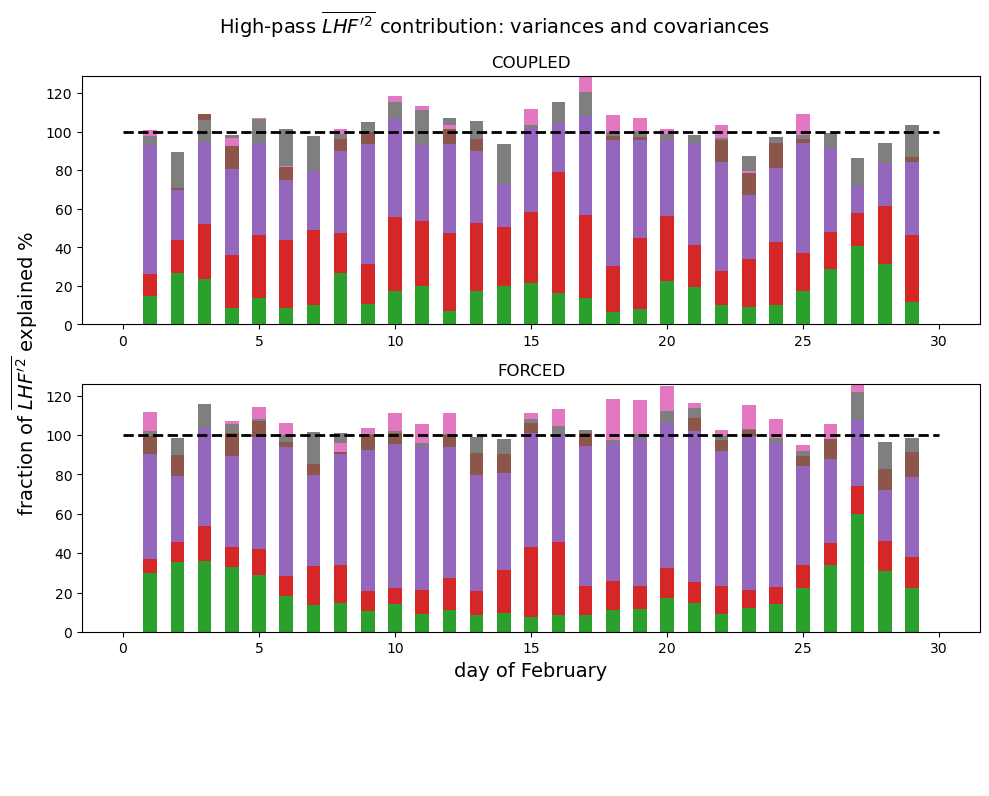

In [38]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

fig.suptitle(r"High-pass $\overline{LHF'^{2}}$ contribution: variances and covariances", fontsize=14)



days = np.arange(1,30)


width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_cou.items():
    if 'all' in boolean:
        p = ax0.bar(days, weight_count, width, bottom=bottom)
    if 'all' not in boolean:
        p = ax0.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

ax0.set_title('COUPLED', fontsize=12)








width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_for.items():
    if 'all' in boolean:
        p = ax1.bar(days, weight_count, width, bottom=bottom)
    if 'all' not in boolean:
        p = ax1.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

# ax.set_title("Number of penguins with above average body mass")
ax1.set_title('FORCED', fontsize=12)
ax1.set_xlabel('day of February', fontsize=14)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



ax1.set_ylabel(r"                                            fraction of $\overline{LHF'^{2}}$ explained %", fontsize=14)


ax0.hlines(100, xmin=0, xmax=30, linestyle='--', linewidth=2, color='k')
ax1.hlines(100, xmin=0, xmax=30, linestyle='--', linewidth=2, color='k')


plt.tight_layout()

## BAND PASS

In [4]:
passabanda_files = glob.glob('/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW*band-pass*DIR*_all.nc')
passabanda_files = sorted(passabanda_files)


ds_cou = xr.open_dataset(passabanda_files[0])
ds_for = xr.open_dataset(passabanda_files[1])


lambda_U_for = ds_for['lambda_U'].values
lambda_sst_for = ds_for['lambda_sst'].values
lambda_q_for = ds_for['lambda_q'].values
lambda_ta_for = ds_for['lambda_ta'].values
lambda_RH_for = ds_for['lambda_RH'].values

var_lhf_for = ds_for['var_lhf'].values
var_qa_for = ds_for['var_qa'].values
var_U_for = ds_for['var_U'].values
var_ta_for = ds_for['var_ta'].values
var_RH_for = ds_for['var_RH'].values
covar_U_ta_for = ds_for['covar_U_ta'].values
covar_U_RH_for = ds_for['covar_U_RH'].values
covar_ta_RH_for = ds_for['covar_ta_RH'].values
covar_U_q_for = ds_for['covar_U_q'].values

# sst terms
var_sst_for = ds_for['var_sst'].values
covar_ta_sst_for = ds_for['covar_ta_sst'].values
covar_U_sst_for = ds_for['covar_U_sst'].values
covar_RH_sst_for = ds_for['covar_RH_sst'].values
covar_q_sst_for = ds_for['covar_q_sst'].values


# sst_terms_for = (lambda_sst_for**2*var_sst_for + 2*lambda_sst_for*(lambda_U_for*covar_U_sst_for + \
#                                                                    lambda_ta_for*covar_ta_sst_for + \
#                                                                    lambda_RH_for*covar_RH_sst_for ))
# non_sst_terms_for = (lambda_U_for**2*var_U_for + lambda_ta_for**2*var_ta_for + lambda_RH_for**2*var_RH_for + 
#                      lambda_U_for*lambda_ta_for*covar_U_ta_for + lambda_U_for*lambda_RH_for*covar_U_RH_for + \
#                      lambda_ta_for*lambda_RH_for*covar_ta_RH_for)
# var_lhf_sum_for = sst_terms_for + non_sst_terms_for



sst_terms_for = (lambda_sst_for**2*var_sst_for + 2*lambda_sst_for*(lambda_U_for*covar_U_sst_for +\
                                                                   lambda_q_for*covar_q_sst_for ))
non_sst_terms_for = (lambda_U_for**2*var_U_for + lambda_q_for**2*var_qa_for + 2*lambda_q_for*lambda_U_for*covar_U_q_for)
var_lhf_sum_for = sst_terms_for + non_sst_terms_for




# Variables for ds_cou
lambda_U_cou = ds_cou['lambda_U'].values
lambda_sst_cou = ds_cou['lambda_sst'].values
lambda_q_cou = ds_cou['lambda_q'].values
lambda_ta_cou = ds_cou['lambda_ta'].values
lambda_RH_cou = ds_cou['lambda_RH'].values

var_lhf_cou = ds_cou['var_lhf'].values
var_qa_cou = ds_cou['var_qa'].values
var_U_cou = ds_cou['var_U'].values
var_ta_cou = ds_cou['var_ta'].values
var_RH_cou = ds_cou['var_RH'].values
covar_U_ta_cou = ds_cou['covar_U_ta'].values
covar_U_RH_cou = ds_cou['covar_U_RH'].values
covar_ta_RH_cou = ds_cou['covar_ta_RH'].values
covar_U_q_cou = ds_cou['covar_U_q'].values

# sst terms
var_sst_cou = ds_cou['var_sst'].values
covar_ta_sst_cou = ds_cou['covar_ta_sst'].values
covar_U_sst_cou = ds_cou['covar_U_sst'].values
covar_RH_sst_cou = ds_cou['covar_RH_sst'].values
covar_q_sst_cou = ds_cou['covar_q_sst'].values


sst_terms_cou = (lambda_sst_cou**2*var_sst_cou + 2*lambda_sst_cou*(lambda_U_cou*covar_U_sst_cou +\
                                                                   lambda_q_cou*covar_q_sst_cou ))
non_sst_terms_cou = (lambda_U_cou**2*var_U_cou + lambda_q_cou**2*var_qa_cou + 2*lambda_q_cou*lambda_U_cou*covar_U_q_cou)
var_lhf_sum_cou = sst_terms_cou + non_sst_terms_cou


In [5]:
# var_lhf_sum_for*100./var_lhf_for
tot_sst_for_pc = sst_terms_for*100./var_lhf_for
tot_Nonsst_for_pc = non_sst_terms_for*100./var_lhf_for
varU_for_pc = lambda_U_for**2*var_U_for*100/var_lhf_for
varQ_for_pc = lambda_q_for**2*var_qa_for*100/var_lhf_for
varSST_for_pc = lambda_sst_for**2*var_sst_for*100/var_lhf_for
covUSST_for_pc = lambda_U_for*lambda_sst_for*covar_U_sst_for*100*2/var_lhf_for
covQSST_for_pc = lambda_q_for*lambda_sst_for*covar_q_sst_for*100*2/var_lhf_for
covQU_for_pc = lambda_U_for*lambda_q_for*covar_U_q_for*100*2/var_lhf_for

# vars_for_pc = {'tot_sst_for_pc':tot_sst_for_pc, 'tot_Nonsst_for_pc':tot_Nonsst_for_pc, 'varU_for_pc':varU_for_pc, \
#                'varQ_for_pc':varQ_for_pc, 'varSST_for_pc':varSST_for_pc, \
#                'covUSST_for_pc':covUSST_for_pc, 'covQSST_for_pc':covQSST_for_pc, 'covQU_for_pc':covQU_for_pc}


vars_for_pc = {'SST all':tot_sst_for_pc, 'NON-SST all':tot_Nonsst_for_pc, 'U_U':varU_for_pc, 'Q_Q':varQ_for_pc, 'SST_SST':varSST_for_pc, 'U_SST':covUSST_for_pc, 'Q_SST':covQSST_for_pc, 'Q_U':covQU_for_pc}



# var_lhf_sum_cou*100./var_lhf_cou
tot_sst_cou_pc = sst_terms_cou*100./var_lhf_cou
tot_Nonsst_cou_pc = non_sst_terms_cou*100./var_lhf_cou
varU_cou_pc = lambda_U_cou**2*var_U_cou*100/var_lhf_cou
varQ_cou_pc = lambda_q_cou**2*var_qa_cou*100/var_lhf_cou
varSST_cou_pc = lambda_sst_cou**2*var_sst_cou*100/var_lhf_cou
covUSST_cou_pc = lambda_U_cou*lambda_sst_cou*covar_U_sst_cou*100*2/var_lhf_cou
covQSST_cou_pc = lambda_q_cou*lambda_sst_cou*covar_q_sst_cou*100*2/var_lhf_cou
covQU_cou_pc = lambda_U_cou*lambda_q_cou*covar_U_q_cou*100*2/var_lhf_cou

# vars_cou_pc = {'tot_sst_cou_pc':tot_sst_cou_pc, 'tot_Nonsst_cou_pc':tot_Nonsst_cou_pc, 'varU_cou_pc':varU_cou_pc, \
#                'varQ_cou_pc':varQ_cou_pc, 'varSST_cou_pc':varSST_cou_pc, \
#                'covUSST_cou_pc':covUSST_cou_pc, 'covQSST_cou_pc':covQSST_cou_pc, 'covQU_cou_pc':covQU_cou_pc}

vars_cou_pc = {'SST all':tot_sst_cou_pc, 'NON-SST all':tot_Nonsst_cou_pc, 'U_U':varU_cou_pc, 'Q_Q':varQ_cou_pc, 'SST_SST':varSST_cou_pc,'U_SST':covUSST_cou_pc, 'Q_SST':covQSST_cou_pc, 'Q_U':covQU_cou_pc}

In [6]:
medians_for = {}

for var_name, values in vars_for_pc.items():
    medians_for[var_name] = np.nanmedian(values, axis=(1,2))
    
    
medians_cou = {}

for var_name, values in vars_cou_pc.items():
    medians_cou[var_name] = np.nanmedian(values, axis=(1,2))
        

In [11]:
medians_cou['NON-SST all']

array([ 42.01286763,  90.11094689,  85.52809258,  51.31579606,
        71.68305126,  80.93642098,  93.66117503,  63.41503061,
        50.16517787,  57.36170953,  59.1111449 ,  67.08947219,
        83.73655831,  96.24009232,  91.77742279,  83.63946368,
        64.4270403 ,  50.49862351,  73.78628968,  90.27653499,
        78.65109485,  43.77904805,  61.47022226,  59.91839973,
        58.21002224,  75.99687217, 103.57990992, 103.92722679,
       102.69946153])

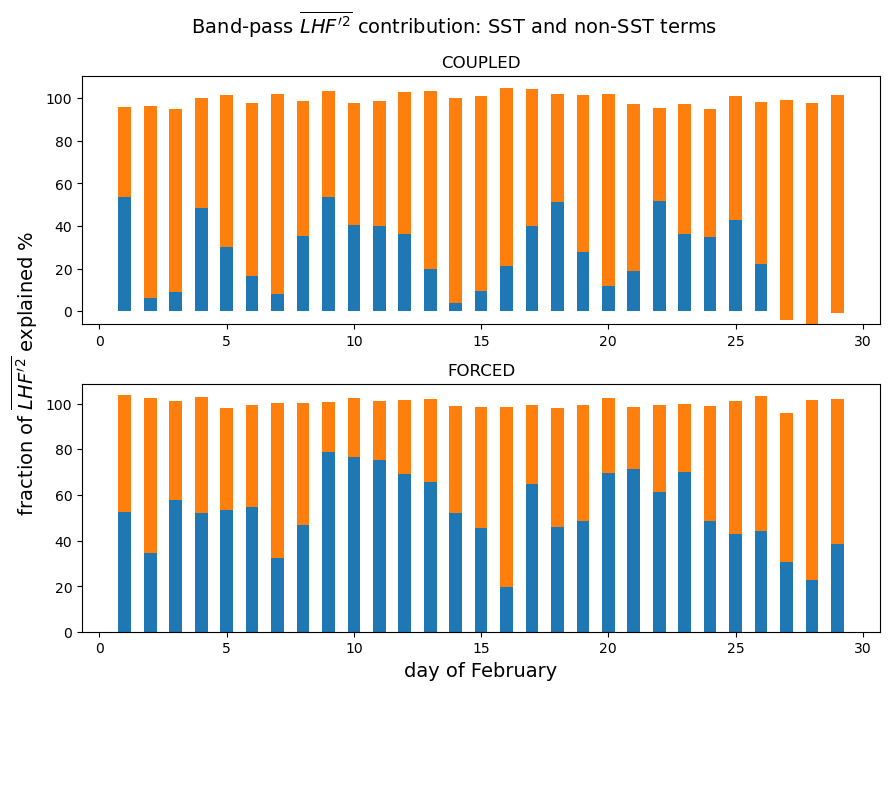

In [31]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))

fig.suptitle(r"   Band-pass $\overline{LHF'^{2}}$ contribution: SST and non-SST terms", fontsize=14)



days = np.arange(1,30)



width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_cou.items():
    if 'all' in boolean:
        p = ax0.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

ax0.set_title('COUPLED', fontsize=12)


# ax0.legend(bbox_to_anchor=(0.02, 1.25), loc='upper left')

width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_for.items():
    if 'all' in boolean:
        p = ax1.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count


ax1.set_title('FORCED', fontsize=12)
ax1.set_xlabel('day of February', fontsize=14)
ax1.set_ylabel(r"                                            fraction of $\overline{LHF'^{2}}$ explained %", fontsize=14)




# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')





plt.tight_layout()

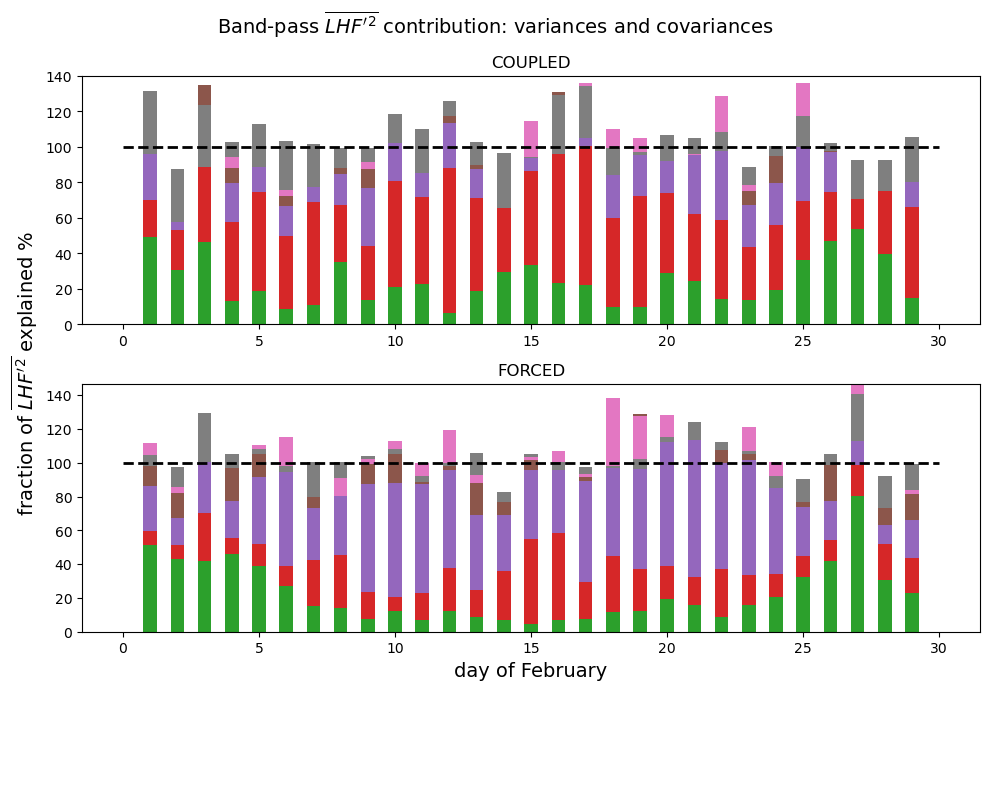

In [32]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

fig.suptitle(r"Band-pass $\overline{LHF'^{2}}$ contribution: variances and covariances", fontsize=14)



days = np.arange(1,30)


width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_cou.items():
    if 'all' in boolean:
        #p = ax0.bar(days, weight_count, width, bottom=bottom)
        p = ax0.bar(days, np.zeros(29), width, bottom=bottom)
    if 'all' not in boolean:
        p = ax0.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

ax0.set_title('COUPLED', fontsize=12)
ax0.set_ylim([0, 140])

# ax0.legend(bbox_to_anchor=(0.02, 1.5), loc='upper left')





width = 0.5
bottom = np.zeros(len(days))

for boolean, weight_count in medians_for.items():
    if 'all' in boolean:
#         p = ax1.bar(days, weight_count, width, bottom=bottom)
        p = ax1.bar(days, np.zeros(29), width, bottom=bottom)
    if 'all' not in boolean:
        p = ax1.bar(days, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count


ax1.set_title('FORCED', fontsize=12)
ax1.set_xlabel('day of February', fontsize=14)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



ax1.set_ylabel(r"                                            fraction of $\overline{LHF'^{2}}$ explained %", fontsize=14)


ax0.hlines(100, xmin=0, xmax=30, linestyle='--', linewidth=2, color='k')
ax1.hlines(100, xmin=0, xmax=30, linestyle='--', linewidth=2, color='k')


plt.tight_layout()